# DataMining Midterm

#### Mehrdad Heshmat


#### Importing Libraries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

# Libraries required for making, displaying, and exporting the image of decision tree. 
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#### Loading Data:

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima = pima.drop(index=0)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


#### Splitting & Learning:

#### Without pruning:

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


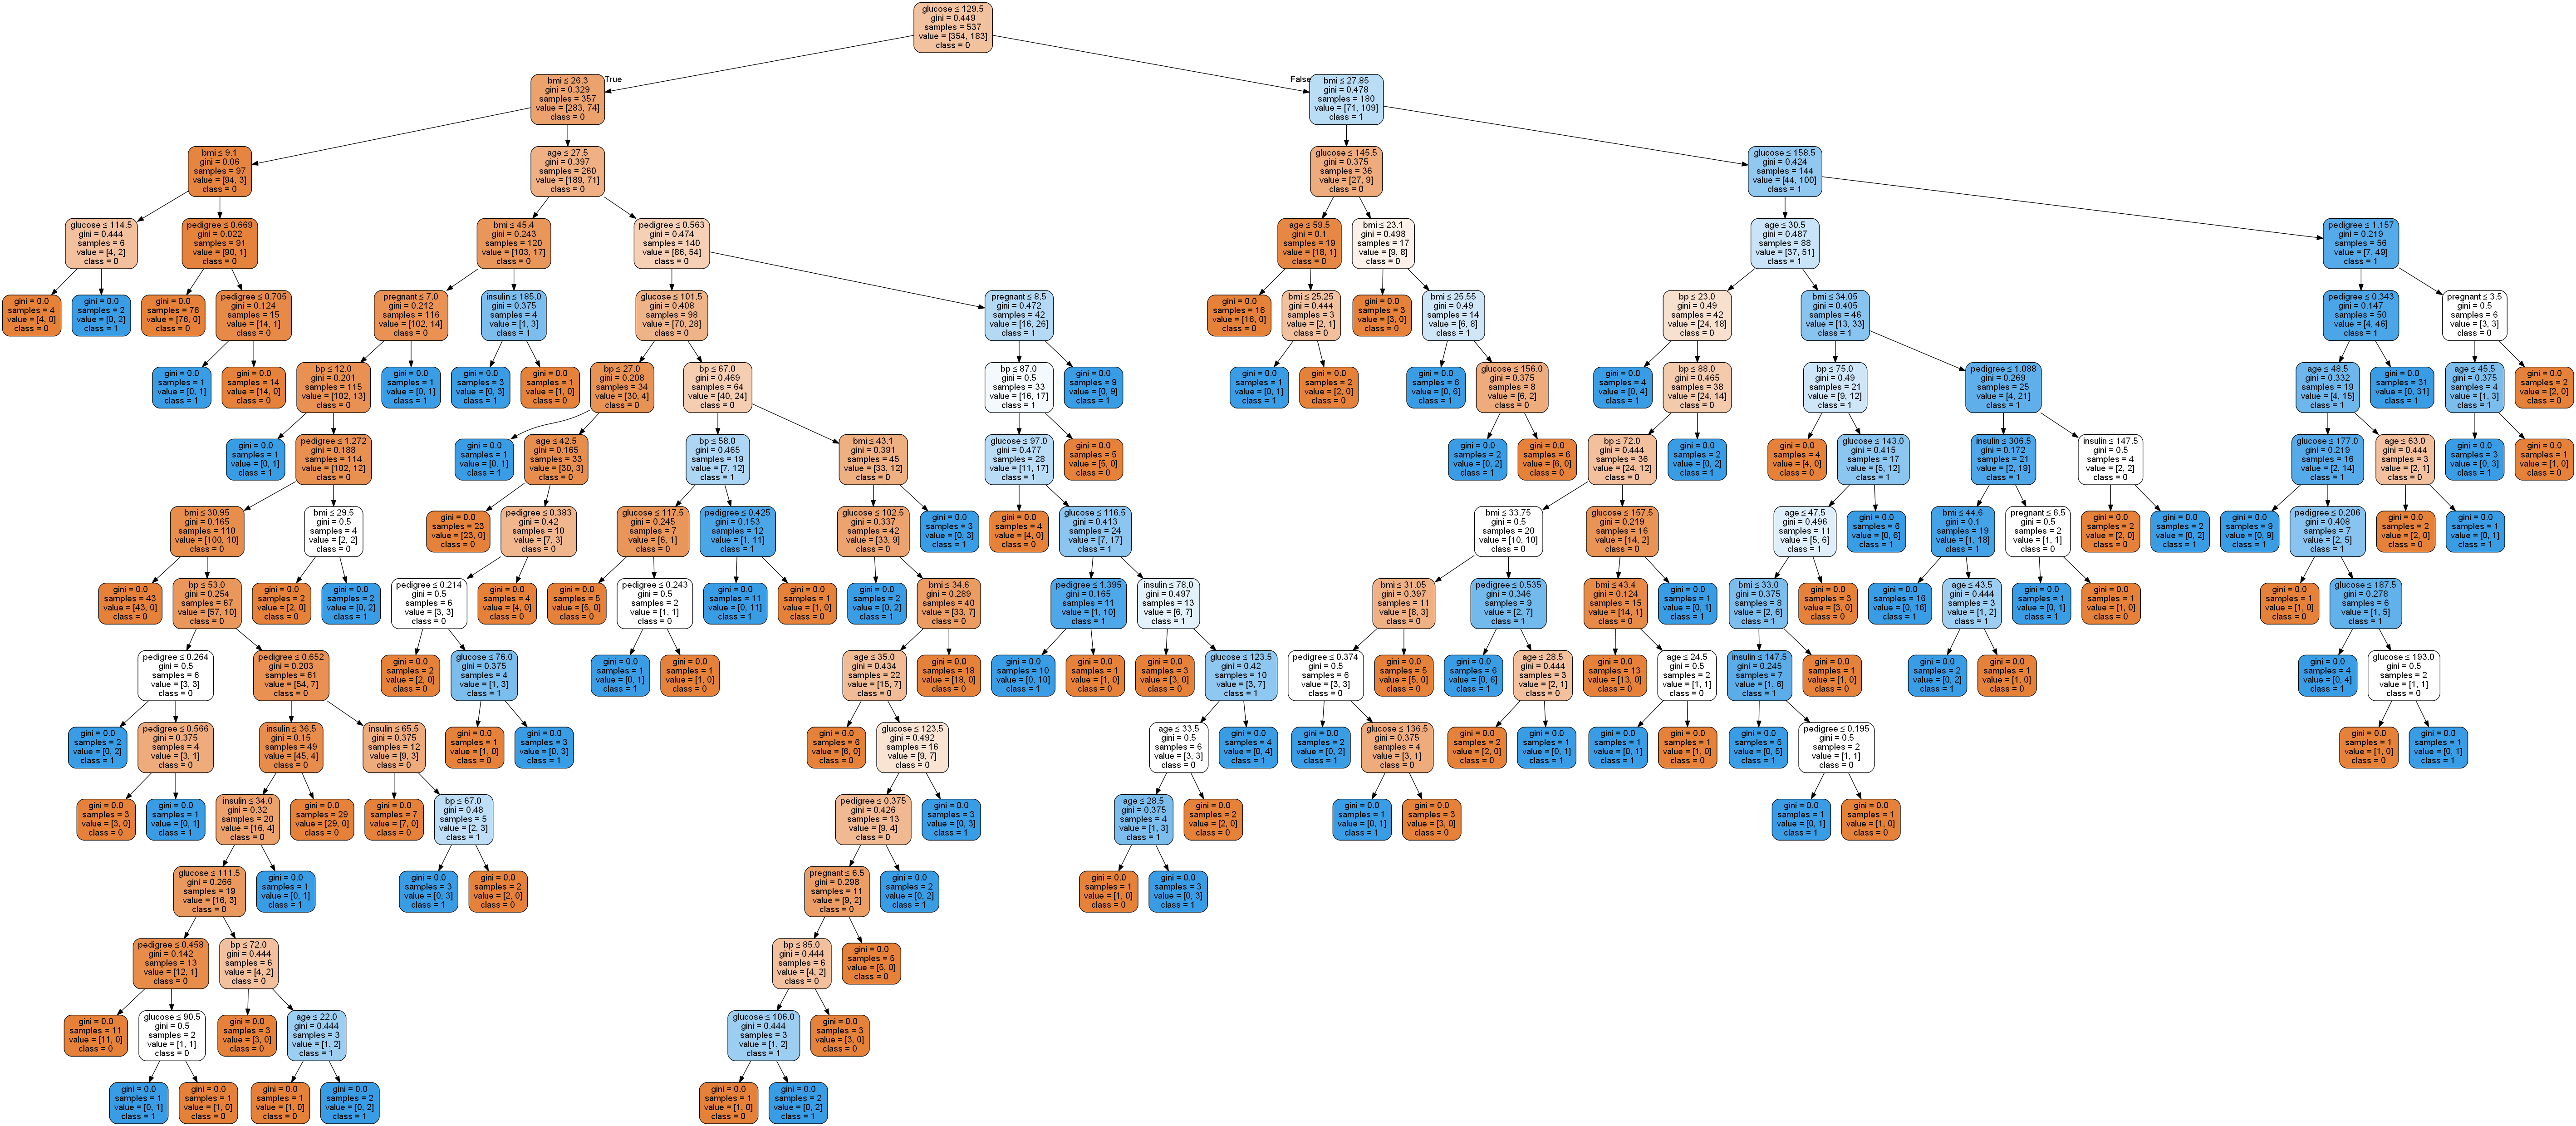

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_no_pruning.png')
Image(graph.create_png())

#### Deciding which criterion (or attribute selection measure) to use: gini or entropy?

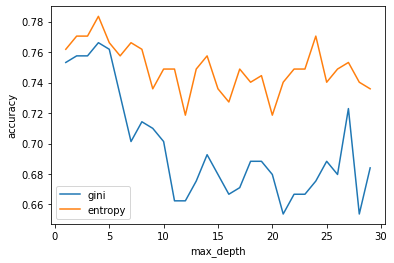

In [9]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, pred))
    ####
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

### As we can see max_depth = 4 with Entropy measure, has the most accuracy in test data.

#### Now we'll use pre-pruning method, using max_depth and entropy

#### with pruning (pre-pruning):

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7878787878787878


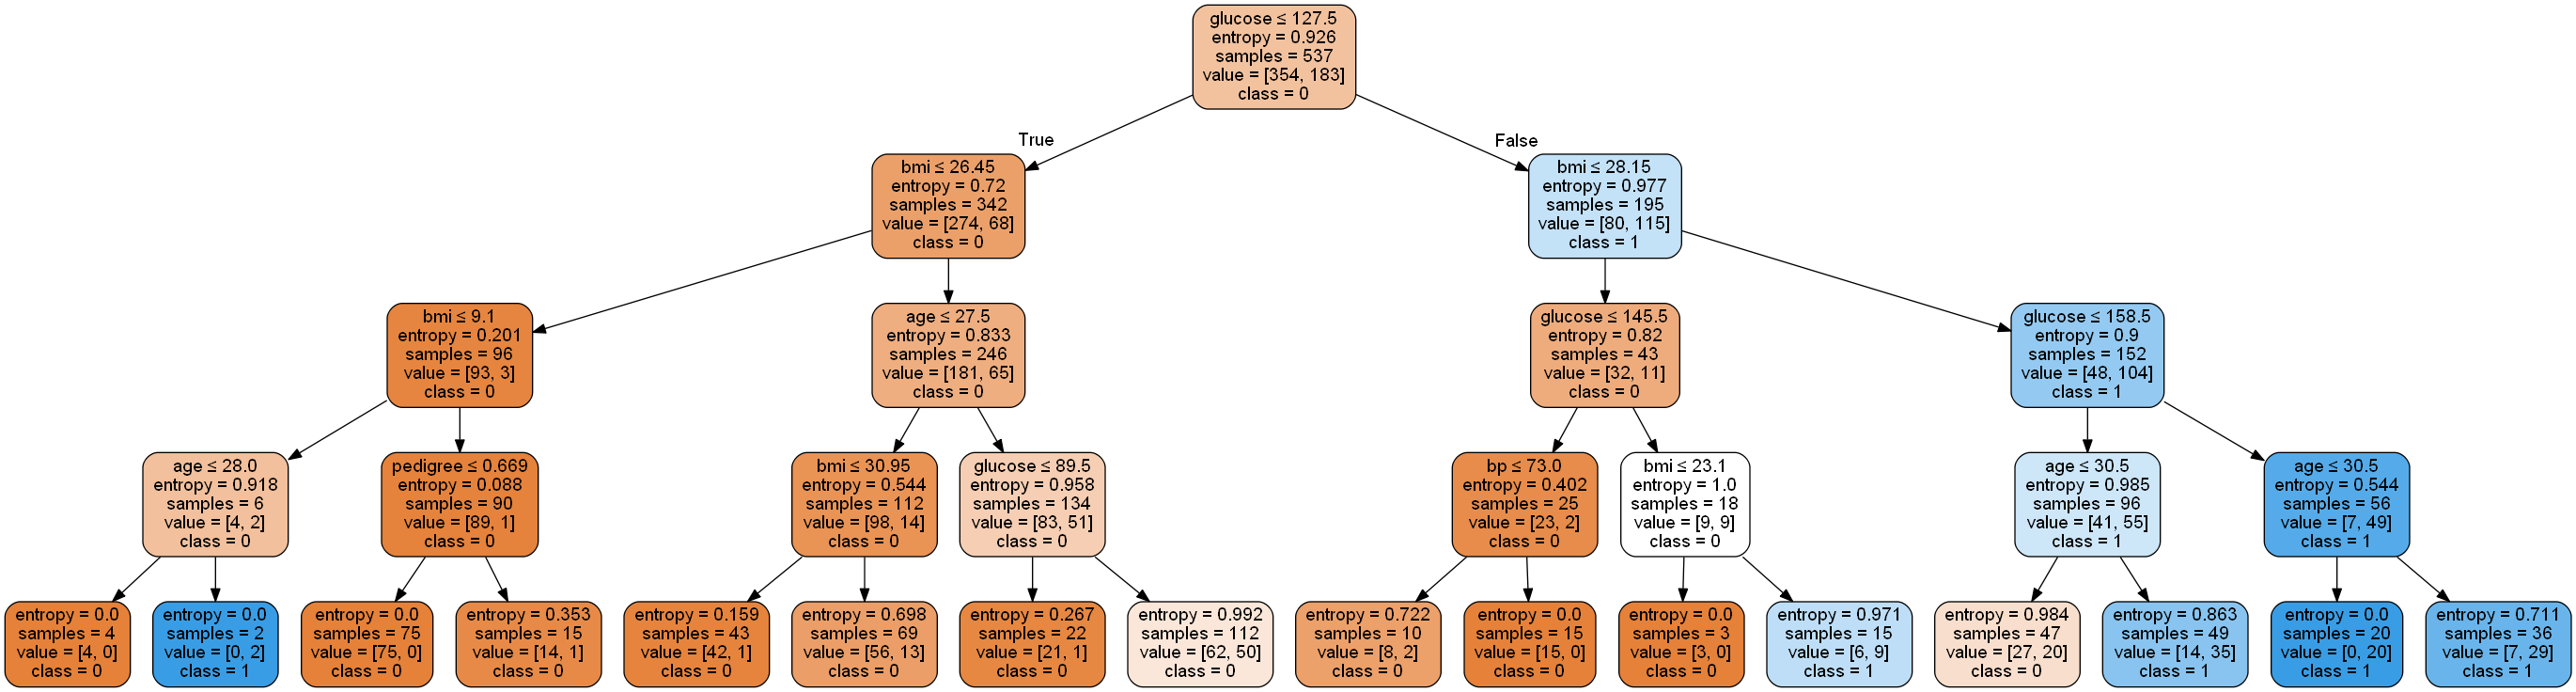

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_with_pruning.png')
Image(graph.create_png())

We can see that accuracy is increased after pruning. So we can say that pruning has eliminated over-fitting.

Resources I used to solve this question and implement the decission tree:  
   https://www.kaggle.com/uciml/pima-indians-diabetes-database  
   https://www.datacamp.com/community/tutorials/decision-tree-classification-python  
   https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752  
   https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial  